In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt

In [2]:
column_names=['x_n','t_n']
df=pd.read_csv('hw1-fitting.csv',index_col=0,names=column_names,header=None)

In [3]:
df

,x_n,t_n
1,0.000000,0.991459
2,0.105263,0.360328
3,0.210526,0.558448
4,0.315789,0.265560
5,0.421053,-1.364200
6,0.526316,-1.983883
7,0.631579,-1.551820
8,0.736842,-0.020161
9,0.842105,1.164831
10,0.947368,1.090539


In [12]:
def polynomial_fit(M,df,plot=True):
    x_n=np.array(df.iloc[:,0])
    t_n=np.array(df.iloc[:,1])
    X, Y = np.meshgrid(np.arange(M+1),np.arange(M+1))
    Z=X+Y
    A=np.array([[sum(x_n**el) for el in row] for row in Z])
    T=np.array([(x_n**i).dot(t_n) for i in np.arange(M+1)])
    w=linalg.solve(A,T)
    y=lambda x,w:(x**np.arange(M+1)).dot(w)
    y_out=np.array([y(x,w) for x in x_n])
    if plot==True:
        plt.scatter(data=df,x='x_n',y='t_n')
        plt.plot(x_n,y_out)
    return sum((t_n-y_out)**2),linalg.cond(A)*(linalg.norm(A.dot(w)-T))/linalg.norm(T)

In [13]:
np.array([polynomial_fit(m,df,plot=False) for m in np.arange(20)])

array([[3.29063913e+01, 0.00000000e+00],
       [2.31810168e+01, 0.00000000e+00],
       [1.80789209e+01, 1.27218674e-13],
       [1.78928603e+01, 6.54113047e-12],
       [1.25905892e+01, 1.09983879e-09],
       [1.24301870e+01, 2.82526058e-08],
       [6.53579236e+00, 9.18376756e-05],
       [6.41178331e+00, 1.65948250e-02],
       [2.83373721e+00, 4.59882926e+00],
       [2.41764455e+00, 2.45487588e+03],
       [2.40936261e+00, 5.74473863e+04],
       [2.39222170e+00, 9.96031035e+07],
       [2.80859989e+00, 1.52624673e+10],
       [1.47974697e+00, 5.30688853e+09],
       [1.49640674e+00, 1.51010745e+11],
       [1.57784583e+00, 4.26614077e+11],
       [1.41350181e+00, 1.15542284e+12],
       [1.39459659e+00, 2.13670827e+12],
       [1.35016384e+00, 5.11011737e+13],
       [1.34495099e+00, 1.57864938e+13]])

(2.8337372149712285, 4.598829261330154)

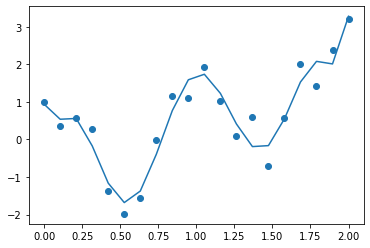

In [17]:
polynomial_fit(8,df)